C:\Users\Ryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\Ryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=sel

,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,9.761650e-12,298.677552,-20505.659672,0.049440
expon,9.761650e-12,296.677553,-20512.128917,0.049440
gompertz,9.800566e-12,298.502637,-20503.093421,0.053898
halfcauchy,1.360949e-11,298.755938,-20297.791579,0.047544
johnsonsb,1.372052e-11,297.620101,-20279.612474,0.046562
halflogistic,1.380590e-11,297.682193,-20288.549477,0.078501
geninvgauss,1.599667e-11,300.784659,-20180.612439,0.050901
moyal,2.091571e-11,300.818331,-20020.613795,0.096424
chi,2.402237e-11,299.505654,-19924.821669,0.058373
bradford,2.553445e-11,289.733416,-19885.448959,0.114556


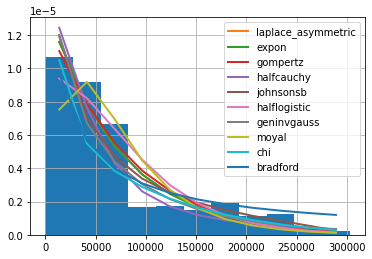

In [3]:
import openpyxl
from pathlib import Path
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import math
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from fitter import Fitter

# wb_obj = openpyxl.load_workbook('owid-covid-data.xlsx')
wb_obj = openpyxl.load_workbook('C:/Users/Ryan/Desktop/B374-Code/stats/owid-covid-data.xlsx') 

# Read the active sheet:
sheet = wb_obj.active

rows = sheet.rows

headers = [cell.value for cell in next(rows)]

list_dict = []

# Afghanistan
## Get data
for row in rows:
    data = {}
    flag = False
    for title, cell in zip(headers, row):
        if cell.value == "United States":
            flag = True

        if flag and title == "new_cases":
            data[title] = cell.value

        if flag and title == "date":
            data[title] = cell.value

    # for title, cell in zip(headers, row):
        # print(title, cell.value)
        # if cell.value == "AFG":
        #     data[title] = cell.value
    list_dict.append(data)
    # filter(None, data)
# print(list_dict)

dates = []
y = []
for dic in list_dict:
    for key in dic:
        if key == 'date':
            dates.append(dic[key])
        if key == 'new_cases':
            if dic[key] != None:
                y.append(dic[key])
        # print(key)
        # print(dic[key])
    # if dat['date'] != None:
    #     dates.append(dat['date'])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

new_y = np.array(y)

f = Fitter(new_y, bins=math.ceil(1 + math.log2(len(y))))
f.fit()
f.summary(Nbest=10)